# Wczytywanie danych

In [4]:
# Read csv file

import numpy as np
import pandas as pd
import sklearn as sk

file_data = pd.read_csv('credit_data.csv')

# Drops unnecessary first column containing original row numbers
credit_data = file_data.drop('Unnamed: 0', axis=1)

In [5]:
# Shows first five rows of data from file
credit_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


# Procesowanie danych

In [6]:
# One hot and dummy encoding

def one_hot(df, nan = False):
    original = list(df.columns)
    category = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns = category, dummy_na = nan, drop_first = True)
    new_columns = [c for c in df.columns if c not in original]
    return df, new_columns

In [7]:
credit_data['Saving accounts'] = credit_data['Saving accounts'].fillna('no_data')
credit_data['Checking account'] = credit_data['Checking account'].fillna('no_data')

In [8]:
credit_data = credit_data.merge(pd.get_dummies(credit_data['Purpose'], drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
credit_data = credit_data.merge(pd.get_dummies(credit_data['Sex'], drop_first=True, prefix='Sex'), left_index=True, right_index=True)
credit_data = credit_data.merge(pd.get_dummies(credit_data['Housing'], drop_first=True, prefix='Housing'), left_index=True, right_index=True)
credit_data = credit_data.merge(pd.get_dummies(credit_data["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
credit_data = credit_data.merge(pd.get_dummies(credit_data.Risk, prefix='Risk'), left_index=True, right_index=True)
credit_data = credit_data.merge(pd.get_dummies(credit_data["Checking account"], drop_first=True, prefix='Checking'), left_index=True, right_index=True)

credit_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,...,Housing_rent,Savings_moderate,Savings_no_data,Savings_quite rich,Savings_rich,Risk_bad,Risk_good,Checking_moderate,Checking_no_data,Checking_rich
0,67,male,2,own,no_data,little,1169,6,radio/TV,good,...,0,0,1,0,0,0,1,0,0,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,...,0,0,0,0,0,1,0,1,0,0
2,49,male,1,own,little,no_data,2096,12,education,good,...,0,0,0,0,0,0,1,0,1,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,...,0,0,0,0,0,0,1,0,0,0
4,53,male,2,free,little,little,4870,24,car,bad,...,0,0,0,0,0,1,0,0,0,0


In [9]:
# Delete these data columns for models and use certain one-hot values instead

del credit_data["Saving accounts"]
del credit_data["Checking account"]
del credit_data["Purpose"]
del credit_data["Sex"]
del credit_data["Housing"]
del credit_data["Risk"]
del credit_data['Risk_good']

In [10]:
# Scale credit amount by natural log function to smaller values

credit_data['Credit amount'] = np.log(credit_data['Credit amount'])
credit_data.head()

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,...,Housing_own,Housing_rent,Savings_moderate,Savings_no_data,Savings_quite rich,Savings_rich,Risk_bad,Checking_moderate,Checking_no_data,Checking_rich
0,67,2,7.063904,6,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,22,2,8.691315,48,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0
2,49,1,7.647786,12,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,45,2,8.972337,42,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,53,2,8.490849,24,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Dzielenie danych na zbiory

In [11]:
# Define X and y variables, use bad risk examples as y

X = credit_data.drop('Risk_bad', axis = 1).values
y = credit_data["Risk_bad"].values

# Podział na zbiory uczące i testowe

In [12]:
from sklearn.model_selection import train_test_split

# 80-20 data split between training and testing, set randomness
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
seed = 5

# Nauka podstawowego modelu MLP

In [31]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_predicted = mlp.predict(X_test)

c:\users\mbagnsk\desktop\pendrive\studiapendrive\magisterka1\iims\aum\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [32]:
mlp_score = mlp.score(X_test, y_test)
print("MLP Classifier Accuracy Score: {:.2f}%".format(mlp_score*100))

MLP Classifier Accuracy Score: 74.00%


<AxesSubplot:>

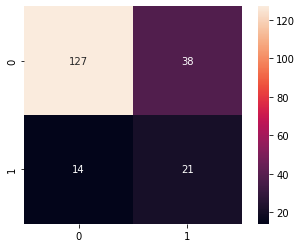

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_predicted, y_test)
values = np.unique(y_predicted)

sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar='False', xticklabels=values, yticklabels=values)

In [34]:
from sklearn.metrics import classification_report

print('Raport klasyfikacji:')
print(classification_report(y_test, y_predicted))

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       141
           1       0.60      0.36      0.45        59

    accuracy                           0.74       200
   macro avg       0.68      0.63      0.64       200
weighted avg       0.72      0.74      0.72       200



# Polepszanie modelu 

In [ ]:
# grid search

from sklearn.neural_network import MLPClassifier
mlp_grid = MLPClassifier()

parameter_space = {
    'hidden_layer_sizes': [20, 40, 60, 80, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'learning_rate_init': [0.1, 0.01, 0.001]
}

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_grid, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Nauka ulepszonego modelu

In [47]:
# MLPClassifier + values indicated by GridSearch
from sklearn.neural_network import MLPClassifier

mlp_grid = MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=20, max_iter = 100,
                    learning_rate='constant', learning_rate_init=0.001,
                    solver='lbfgs')
mlp_grid.fit(X_train, y_train)

y_grid_predicted = mlp_grid.predict(X_test)

c:\users\mbagnsk\desktop\pendrive\studiapendrive\magisterka1\iims\aum\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [48]:
mlp_grid_score = mlp_grid.score(X_test, y_test)
print("MLP Classifier Accuracy Score: {:.2f}%".format(mlp_grid_score*100))

MLP Classifier Accuracy Score: 75.00%


# Metryki dla polepszonego modelu

Macierz konfuzji: 


<AxesSubplot:>

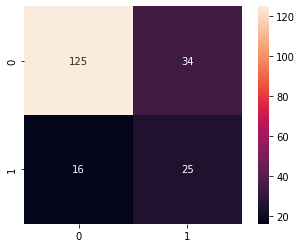

In [49]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

matrix_grid = confusion_matrix(y_grid_predicted, y_test)
values_grid = np.unique(y_grid_predicted)

print('Macierz konfuzji: ')
sns.heatmap(matrix_grid, square=True, annot=True, fmt='d', cbar='False', xticklabels=values_grid, yticklabels=values_grid)


In [50]:
from sklearn.metrics import classification_report

print('Raport klasyfikacji:')
print(classification_report(y_test, y_grid_predicted))

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       141
           1       0.61      0.42      0.50        59

    accuracy                           0.75       200
   macro avg       0.70      0.66      0.67       200
weighted avg       0.73      0.75      0.73       200



# Zestawienie wyników uzyskanych dla obu modeli

In [51]:
print("MLP Classifier Accuracy Score: {:.2f}%".format(mlp_score*100))
print("MLP_Grid Classifier Accuracy Score: {:.2f}%".format(mlp_grid_score*100))

MLP Classifier Accuracy Score: 74.00%
MLP_Grid Classifier Accuracy Score: 75.00%


Macierz konfuzji MLP: 


<AxesSubplot:>

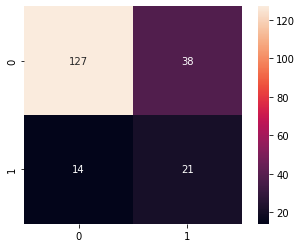

In [52]:
print('Macierz konfuzji MLP: ')
sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar='False', xticklabels=values, yticklabels=values)

Macierz konfuzji MLP_grid: 


<AxesSubplot:>

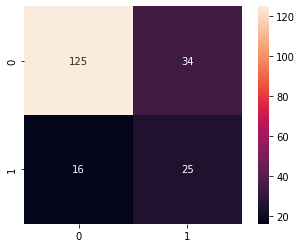

In [53]:
print('Macierz konfuzji MLP_grid: ')
sns.heatmap(matrix_grid, square=True, annot=True, fmt='d', cbar='False', xticklabels=values_grid, yticklabels=values_grid)

In [54]:
print('Raport klasyfikacji MLP:')
print(classification_report(y_test, y_predicted))

Raport klasyfikacji MLP:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       141
           1       0.60      0.36      0.45        59

    accuracy                           0.74       200
   macro avg       0.68      0.63      0.64       200
weighted avg       0.72      0.74      0.72       200



In [55]:
print('Raport klasyfikacji MLP Grid:')
print(classification_report(y_test, y_grid_predicted))

Raport klasyfikacji MLP Grid:
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       141
           1       0.61      0.42      0.50        59

    accuracy                           0.75       200
   macro avg       0.70      0.66      0.67       200
weighted avg       0.73      0.75      0.73       200



# Wizualizacja procesu uczenia

In [26]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

import numpy as np
from matplotlib import pyplot as plt

In [27]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

<module 'matplotlib.pyplot' from 'c:\\users\\mbagnsk\\desktop\\pendrive\\studiapendrive\\magisterka1\\iims\\aum\\lib\\site-packages\\matplotlib\\pyplot.py'>

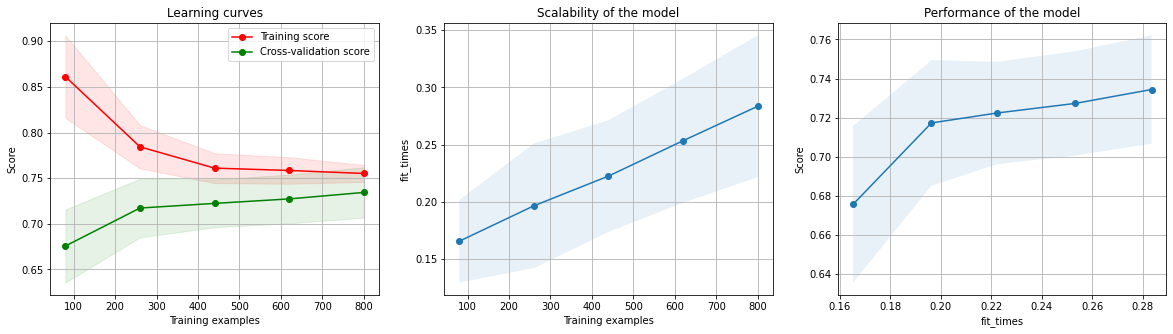

In [28]:
cv = ShuffleSplit(n_splits = 50, test_size = 0.2, random_state = 0)
plot_learning_curve(mlp_grid, 'Learning curves', X, y, axes=None, cv=cv, n_jobs=6)